In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords

In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("jagathratchakan/indian-airlines-customer-reviews")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/indian-airlines-customer-reviews


In [4]:
data = pd.read_csv('/kaggle/input/indian-airlines-customer-reviews/Indian_Domestic_Airline.csv')
data['Recommond'].value_counts()

,count
Recommond,
no,1448
yes,762


In [5]:
data.dropna(inplace=True)

In [6]:
data

,AirLine_Name,Rating - 10,Title,Name,Date,Review,Recommond
0,AirAsia India,6.0,"""crew were welcoming""",V Bakshi,14th October 2023,✅ Trip Verified | I had booked this fare at a ...,yes
1,AirAsia India,1.0,"""furious and disappointed""",G Oscar,14th October 2023,✅ Trip Verified | I travel at least four times...,no
2,AirAsia India,10.0,"""amazing service and support""",Rahul Verma,14th October 2023,✅ Trip Verified | Taking this opportunity to a...,yes
3,AirAsia India,1.0,"""Waste of time and money""",G Akron,14th October 2023,✅ Trip Verified | The worst airlines in the hi...,no
4,AirAsia India,8.0,"""thumbs up to boarding crew""",Sirajudeen Jawahar ali,14th October 2023,✅ Trip Verified | Would like to give big thum...,yes
...,...,...,...,...,...,...,...
2205,Vistara,8.0,"""Vistara was a good experience""",Rudra Bhattacharya,15th June 2016,"Goa to Mumbai, and Vistara was a good experien...",yes
2206,Vistara,6.0,"""the journey was satisfactory""",Atharva Agashe,15th June 2016,Mumbai to Bengaluru. This was my third time fl...,yes
2207,Vistara,10.0,"""value for money""",Abhishek Ghamande,15th June 2016,Flew Vistara for the first time in February fr...,yes
2208,Vistara,8.0,"""aircraft was new and fresh""",Samarendra Patra,15th June 2016,Bhubaneswar to Delhi with Vistara. I had booke...,yes


In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
cv=TfidfVectorizer(max_features=3000)

In [8]:
rewiews=cv.fit_transform(data['Review']).toarray()

In [9]:
data['Recommond']=data['Recommond'].replace(['yes','no'],[1,0])

<ipython-input-9-150aad2d1664>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Recommond']=data['Recommond'].replace(['yes','no'],[1,0])


In [10]:
data['Recommond'].value_counts()

,count
Recommond,
0,1444
1,762


In [11]:
from sklearn.linear_model import LogisticRegression

In [12]:
model = LogisticRegression()

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
Review_train,Review_test,Recommond_train,Recommond_test=train_test_split(rewiews,data['Recommond'],test_size=0.2)

In [15]:
model.fit(Review_train,Recommond_train)

LogisticRegression()

In [16]:
predict = model.predict(Review_test)

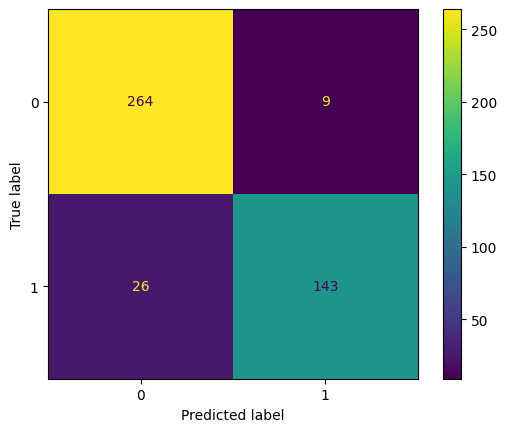

In [17]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(Recommond_test,predict,labels=model.classes_)
display = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
display.plot()
plt.show()

In [18]:
def sentiment_analysis(text):
  text_vectorized = cv.transform([text]).toarray()
  prediction = model.predict(text_vectorized)[0]
  outcome = 'Good Service' if prediction == 1 else 'Bad Service'
  return outcome

In [19]:
sentiment_analysis('Taking this opportunity to appreciate and thank the entire team of I5 792 for providing amazing service and support during the entire journey and making it a memorable one. I have traveled a lot however this was the first time for my parents and trust me it could not have been better than this if it wasn’t the crew who made it happen, specially Mr Shubham the cabin supervisor. He is extremely polite, professional and empathetic. He treated my family like his own and was very polite and respectful to all the other customers as far I noticed. I wish to see cabin crew like him on all flights because they are the ones who make a difference. Would also like to highlight his amazing announcements, loud and clear unlike many other. Once again thank you everyone for an amazing experience hope to see you all in future on AirAsia flights.')

'Good Service'